In [1]:
# Default Parameters
n = 20  # No. of networks to be created
d0mean = 20.0  # Diameter of base of tree
d0std = 5.0  # Standard deviation of base diameter
tissueVolume = (512, 512, 512)  # Specify number of pixels in the tissue volume

In [2]:
# Lindenmayer System Parameters
properties = {
    "k": 3,
    "epsilon": 20,  # random.uniform(4,10), # Proportion between length & diameter
    "randmarg": 3,  # Randomness margin between length & diameter
    "sigma": 3,  # Determines type deviation for Gaussian distributions
    "stochparams": True,
}  # Whether the generated parameters will also be stochastic


In [3]:
import numpy as np
import random
from libGenerator import setProperties
from vSystem import F
from analyseGrammar import branching_turtle_to_coords
from computeVoxel import process_network
from utils import bezier_interpolation
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm
%matplotlib widget

In [4]:
d0 = np.random.normal(d0mean, d0std)  # Ramdonly assign base diameter (no dimension)
niter = random.randint(6, 14)  # Randomly assign number of L-System recursive loops
setProperties(properties)  # Setting L-Sytem properties

vessels = []

for _ in tqdm(range(n)):
    # print("Creating image ... %i with %i iterations" % (file, niter))
    try:
        """ Run L-System grammar for n iterations """
        turtle_program = F(niter, d0)

        """ Convert grammar into coordinates """
        coords = branching_turtle_to_coords(turtle_program, d0)

        """ Analyse / sort coordinate data """
        update = bezier_interpolation(coords)

        """ If you fancy, plot a 2D image of the network! """
        # plot_coords(newdata, array=True, bare_plot=False) # bare_plot removes the axis labels

        """ Run 3D voxel traversal to generate binary mask of L-System network """
        vessels.append(process_network(update, tVol=tissueVolume).astype(np.uint8))


    except SyntaxError as e:
        print(f"Leading 0 error: {e}")
        continue
    except ValueError as e:
        print(f"Division by 0 error: {e}")
        continue

  0%|          | 0/20 [00:00<?, ?it/s]

In [5]:
image = vessels[1]

In [6]:
image.shape

(512, 512, 512)

In [7]:
x,y,z = np.where(image>0)

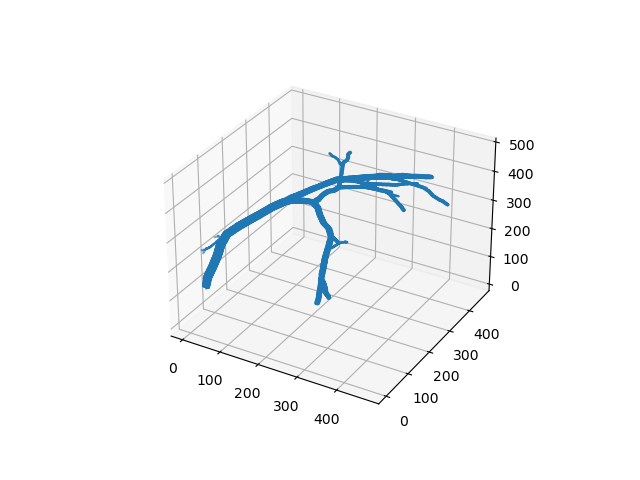

In [8]:
fig = plt.figure()
ax = fig.add_subplot(projection="3d")
ax.scatter(x,y,z,s=0.01)
plt.show()

In [9]:
import scipy.io as scio

In [10]:
for ind, vol in tqdm(enumerate(vessels)):
    x, y, z = np.where(vol>0)
    scio.savemat(f"vessels/sim_{(ind + 1):03d}.mat", {"sim": vol.astype(np.uint8), "x": x.astype(np.uint16), "y":y.astype(np.uint16), "z":z.astype(np.uint16)}, do_compression=True) 

0it [00:00, ?it/s]